# Sentiment Analysis Movies Streaming App

## Import Dataset

In [ ]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data


import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

import matplotlib.pyplot as plt  # Untuk membuat grafik dan visualisasi data
import pandas as pd  # Untuk manipulasi data dalam bentuk tabel (DataFrame)
import numpy as np  # Untuk manipulasi array dan operasi numerik
import seaborn as sns  # Untuk visualisasi data yang lebih baik

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Cleansing

In [2]:
df = pd.read_csv('all_streaming-platform_reviews.csv')  # Membaca file CSV ke dalam DataFrame pandas
df.head()

,app,content,score
0,Netflix,subtitle sering hilang muncul. jujur awal2 lan...,3
1,Netflix,film²nya dan seriesnya banyak dan populer² ser...,4
2,Netflix,kata temen saya ini aplikasi lengkap!! tapi me...,3
3,Netflix,tiap mau nonton pasti ada kesalahan vidio coba...,1
4,Netflix,"Udah berlangganan bulanan, eh di TV perangkat ...",1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12984 entries, 0 to 12983
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   app      12984 non-null  object
 1   content  12984 non-null  object
 2   score    12984 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 304.4+ KB


In [4]:
df.shape

(12984, 3)

In [5]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = df.dropna()

In [6]:
# menghapus baris duplikat
clean_df = clean_df.drop_duplicates()

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12865 entries, 0 to 12982
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   app      12865 non-null  object
 1   content  12865 non-null  object
 2   score    12865 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 402.0+ KB


## Preprocessing Text

###

### Cleaning Text

In [8]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text) # menghapus hastag
    text = re.sub(r'RT[\s]+', '', text) # menghapus RT (retweet)
    text = re.sub(r'https?:\/\/\S+', '', text) # menghapus tautan (link)
    text = re.sub(r'\d+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus tanda baca
    text = text.replace('\n', ' ') # menggantikan karakter newline dengan spasi
    text = text.strip() # menghilangkan spasi ekstra di awal dan akhir teks
    return text

### Casefolding Text

In [9]:
def caseFoldingText(text):
    return text.lower()

### Tokenizing Text

In [10]:
def tokenizingText(text):
    return word_tokenize(text)

### Filtering Text

In [11]:
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", 'aja', 'kok', 'banget', 'dong', 'nih', 'deh', 'kayak', 'tuh', 'gitu',
    'malah', 'lah', 'kan', 'dong', 'makanya', 'hmm', 'huh', 'cie', 'eh',
    'bgt', 'bikin', 'abis', 'udah', 'tau', 'taukan', 'gatau', 'btw', 'jd',
    'krn', 'tp', 'trs', 'sampe', 'ampun', 'yaampun'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    
    text = filtered
    return text

### Stemming Text

In [12]:
def stemmingText(text):
    # membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    
    #memecah teks menjadi daftar kata
    words = text.split()
    
    # menerapkan stemming pada tiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # menggabungkan kata-kata yang telah di-stem
    stemmed_text = ' '.join(stemmed_words)
    return stemmed_text

In [13]:
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

### Fixing Slang Words

In [14]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
            
    fixed_text = ' '.join(fixed_words)
    return fixed_text

### use all functions

In [15]:
# membersihkan teks dan menyimpan di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(caseFoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [16]:
clean_df

,app,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Netflix,subtitle sering hilang muncul. jujur awal2 lan...,3,subtitle sering hilang muncul jujur awal langg...,subtitle sering hilang muncul jujur awal langg...,subtitle sering hilang muncul jujur awal langg...,"[subtitle, sering, hilang, muncul, jujur, awal...","[subtitle, hilang, muncul, jujur, langganan, b...",subtitle hilang muncul jujur langganan b skrng...
1,Netflix,film²nya dan seriesnya banyak dan populer² ser...,4,film²nya dan seriesnya banyak dan populer² ser...,film²nya dan seriesnya banyak dan populer² ser...,film²nya dan seriesnya banyak dan populer² ser...,"[film²nya, dan, seriesnya, banyak, dan, popule...","[film²nya, seriesnya, populer², bagus, jarang,...",film²nya seriesnya populer² bagus jarang error...
2,Netflix,kata temen saya ini aplikasi lengkap!! tapi me...,3,kata temen saya ini aplikasi lengkap tapi menu...,kata temen saya ini aplikasi lengkap tapi menu...,kata teman saya ini aplikasi lengkap tapi menu...,"[kata, teman, saya, ini, aplikasi, lengkap, ta...","[teman, aplikasi, lengkap, lengkap, film, cart...",teman aplikasi lengkap lengkap film cartoon ca...
3,Netflix,tiap mau nonton pasti ada kesalahan vidio coba...,1,tiap mau nonton pasti ada kesalahan vidio coba...,tiap mau nonton pasti ada kesalahan vidio coba...,tiap mau nonton pasti ada kesalahan vidio coba...,"[tiap, mau, nonton, pasti, ada, kesalahan, vid...","[nonton, kesalahan, vidio, coba, restart, apli...",nonton kesalahan vidio coba restart aplikasi j...
4,Netflix,"Udah berlangganan bulanan, eh di TV perangkat ...",1,Udah berlangganan bulanan eh di TV perangkat s...,udah berlangganan bulanan eh di tv perangkat s...,sudah berlangganan bulanan eh di tv perangkat ...,"[sudah, berlangganan, bulanan, eh, di, tv, per...","[berlangganan, bulanan, tv, perangkat, dukung,...",berlangganan bulanan tv perangkat dukung diton...
...,...,...,...,...,...,...,...,...,...
12978,HBO GO,more spesificantional,5,more spesificantional,more spesificantional,more spesificantional,"[more, spesificantional]",[spesificantional],spesificantional
12979,HBO GO,Saya suka,5,Saya suka,saya suka,saya suka,"[saya, suka]",[suka],suka
12980,HBO GO,Wowwww😨😨😨😞,5,Wowwww,wowwww,wowwww,[wowwww],[wowwww],wowwww
12981,HBO GO,👍👍👍👍👍,5,,,,[],[],


## Pelabelan

In [17]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [18]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]


    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 1):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < -1):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [19]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    7528
negative    3288
neutral     2049
Name: count, dtype: int64


In [20]:
clean_df

,app,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,Netflix,subtitle sering hilang muncul. jujur awal2 lan...,3,subtitle sering hilang muncul jujur awal langg...,subtitle sering hilang muncul jujur awal langg...,subtitle sering hilang muncul jujur awal langg...,"[subtitle, sering, hilang, muncul, jujur, awal...","[subtitle, hilang, muncul, jujur, langganan, b...",subtitle hilang muncul jujur langganan b skrng...,14,positive
1,Netflix,film²nya dan seriesnya banyak dan populer² ser...,4,film²nya dan seriesnya banyak dan populer² ser...,film²nya dan seriesnya banyak dan populer² ser...,film²nya dan seriesnya banyak dan populer² ser...,"[film²nya, dan, seriesnya, banyak, dan, popule...","[film²nya, seriesnya, populer², bagus, jarang,...",film²nya seriesnya populer² bagus jarang error...,-9,negative
2,Netflix,kata temen saya ini aplikasi lengkap!! tapi me...,3,kata temen saya ini aplikasi lengkap tapi menu...,kata temen saya ini aplikasi lengkap tapi menu...,kata teman saya ini aplikasi lengkap tapi menu...,"[kata, teman, saya, ini, aplikasi, lengkap, ta...","[teman, aplikasi, lengkap, lengkap, film, cart...",teman aplikasi lengkap lengkap film cartoon ca...,-7,negative
3,Netflix,tiap mau nonton pasti ada kesalahan vidio coba...,1,tiap mau nonton pasti ada kesalahan vidio coba...,tiap mau nonton pasti ada kesalahan vidio coba...,tiap mau nonton pasti ada kesalahan vidio coba...,"[tiap, mau, nonton, pasti, ada, kesalahan, vid...","[nonton, kesalahan, vidio, coba, restart, apli...",nonton kesalahan vidio coba restart aplikasi j...,-17,negative
4,Netflix,"Udah berlangganan bulanan, eh di TV perangkat ...",1,Udah berlangganan bulanan eh di TV perangkat s...,udah berlangganan bulanan eh di tv perangkat s...,sudah berlangganan bulanan eh di tv perangkat ...,"[sudah, berlangganan, bulanan, eh, di, tv, per...","[berlangganan, bulanan, tv, perangkat, dukung,...",berlangganan bulanan tv perangkat dukung diton...,16,positive
...,...,...,...,...,...,...,...,...,...,...,...
12978,HBO GO,more spesificantional,5,more spesificantional,more spesificantional,more spesificantional,"[more, spesificantional]",[spesificantional],spesificantional,0,neutral
12979,HBO GO,Saya suka,5,Saya suka,saya suka,saya suka,"[saya, suka]",[suka],suka,3,positive
12980,HBO GO,Wowwww😨😨😨😞,5,Wowwww,wowwww,wowwww,[wowwww],[wowwww],wowwww,0,neutral
12981,HBO GO,👍👍👍👍👍,5,,,,[],[],,0,neutral


In [21]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12865 entries, 0 to 12982
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   app                   12865 non-null  object
 1   content               12865 non-null  object
 2   score                 12865 non-null  int64 
 3   text_clean            12865 non-null  object
 4   text_casefoldingText  12865 non-null  object
 5   text_slangwords       12865 non-null  object
 6   text_tokenizingText   12865 non-null  object
 7   text_stopword         12865 non-null  object
 8   text_akhir            12865 non-null  object
 9   polarity_score        12865 non-null  int64 
 10  polarity              12865 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


## Data Visualization

### Sentiment Distribution

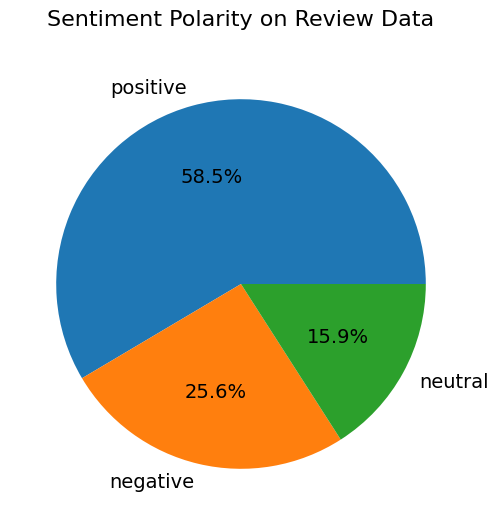

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)
explode = (0, 0, 0)

ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)
plt.show()

### WordCloud Visualization

In [23]:
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1

In [24]:
pd.set_option('display.max_colwidth', 3000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=False)
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1

In [25]:
pd.set_option('display.max_colwidth', 3000)
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)
neutral_tweets = neutral_tweets.reset_index(drop=True)
neutral_tweets.index += 1

#### overall

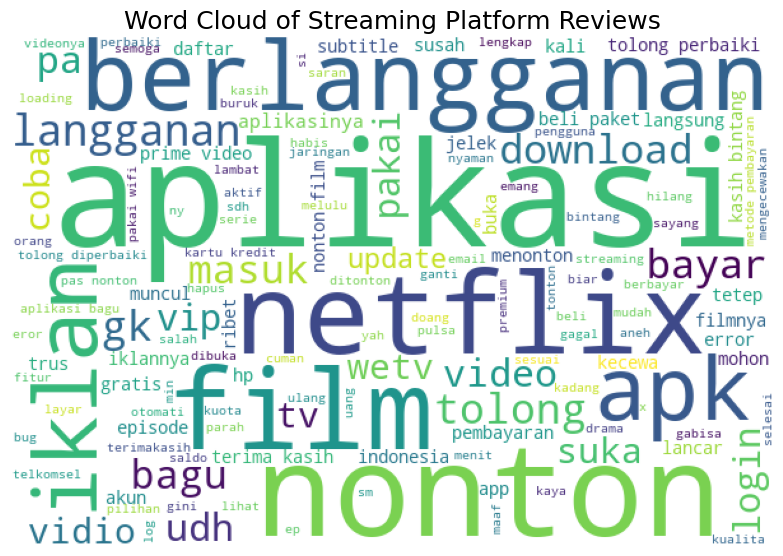

In [26]:
list_words = ' '
for tweet in clean_df['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
        
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Streaming Platform Reviews', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


#### positive

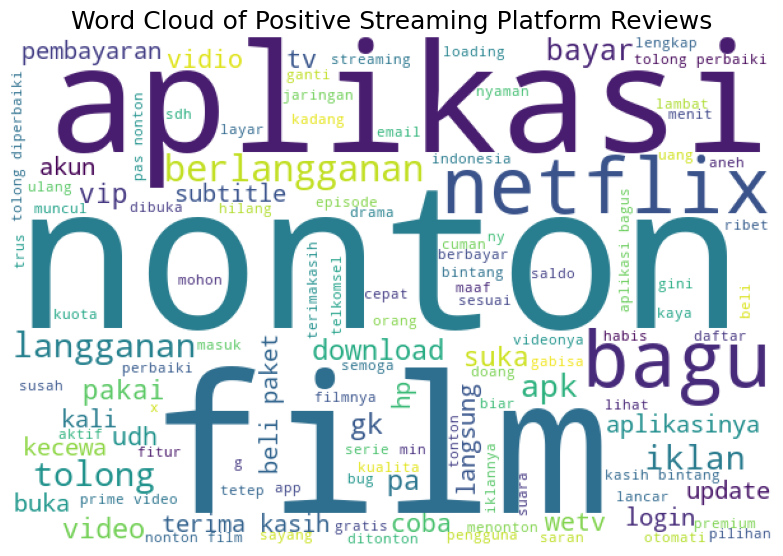

In [27]:
list_words = ' '
for tweet in positive_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
        
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positive Streaming Platform Reviews', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


#### negative

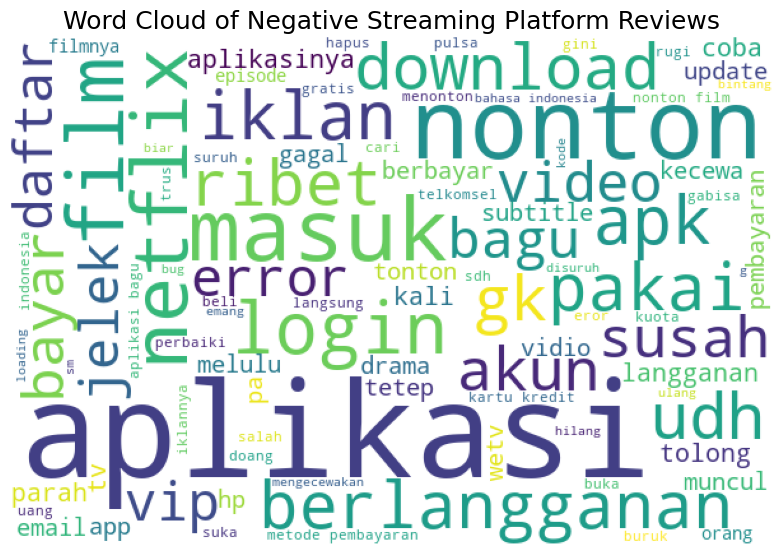

In [28]:
list_words = ' '
for tweet in negative_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
        
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negative Streaming Platform Reviews', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


#### neutral

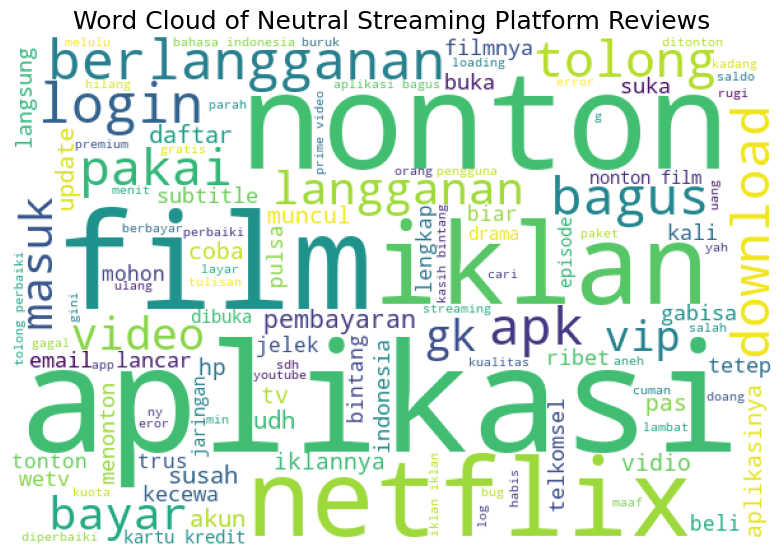

In [29]:
list_words = ' '
for tweet in neutral_tweets['text_stopword']:
    for word in tweet:
        list_words += ' ' + (word)
        
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Neutral Streaming Platform Reviews', fontsize=18)
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


## Training Model

### Logistic Regression, TF-IDF, & SMOTE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = clean_df['text_akhir']
y = clean_df['polarity']

# label encoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)



# TF-IDF (basic)
tfidf_basic = TfidfVectorizer(max_features=2000, min_df=17, max_df=0.8)
X_tfidf_basic = tfidf_basic.fit_transform(X)

# ===== Split Data =====

# TF-IDF Basic
X_train_tfidf_80, X_test_tfidf_80, y_train_tfidf_80, y_test_tfidf_80 = train_test_split(X_tfidf_basic, y_encoded, test_size=0.2, random_state=42, stratify=y)
X_train_tfidf_70, X_test_tfidf_70, y_train_tfidf_70, y_test_tfidf_70 = train_test_split(X_tfidf_basic, y_encoded, test_size=0.3, random_state=42, stratify=y)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

logreg = LogisticRegression(max_iter=1000)
param_grid = {
    "model__C" : [.1, 1, 10],
    "model__solver" : ['lbfgs']
}

pipeline = Pipeline([
    ('model', logreg)
])

grid = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1_macro', verbose=1, n_jobs=-1)
grid.fit(X_train_tfidf_80, y_train_tfidf_80)

# evaluasi
print("Best Params: ", grid.best_params_)

y_pred = grid.predict(X_test_tfidf_80)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_tfidf_80, y_pred))

print("\nClassification Report")
print(classification_report(y_test_tfidf_80, y_pred, target_names=label_encoder.classes_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Params:  {'model__C': 10, 'model__solver': 'lbfgs'}

Confusion Matrix:
[[ 562   66   30]
 [  73  194  143]
 [  26   51 1428]]

Classification Report
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85       658
     neutral       0.62      0.47      0.54       410
    positive       0.89      0.95      0.92      1505

    accuracy                           0.85      2573
   macro avg       0.79      0.76      0.77      2573
weighted avg       0.84      0.85      0.84      2573



### LSTM

In [41]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import  train_test_split
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from gensim.models import Word2Vec

# tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(clean_df['text_akhir'])
sequences = tokenizer.texts_to_sequences(clean_df['text_akhir'])

# padding
max_len = 100
X_pad = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

# label encoding
le = LabelEncoder()
y_enc = le.fit_transform(clean_df['polarity'])
y_cat = to_categorical(y_enc)

# word2vec

tokenized_sentences = clean_df['text_stopword'].tolist()  # pastikan ini list of list of string

w2v_model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=300,
    window=5,
    min_count=2,
    workers=4,
    sg=1
)

# train test split
X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X_pad, y_cat, test_size=.2, random_state=42, stratify=y_cat)

# build embedding matrix from word2vec
embedding_dim = 300
word_index = tokenizer.word_index
num_words = min(10000, len(word_index) + 1)

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
        
# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True, verbose=1)

# model LSTM
model = Sequential()
model.add(Embedding(
    input_dim = num_words,
    output_dim = embedding_dim,
    weights = [embedding_matrix],
    input_length = max_len,
    trainable = True
))
# model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
# model.add(Dropout(.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# weight class
class_weights = compute_class_weight('balanced', classes=np.unique(y_enc), y=y_enc)
class_weights_dict = dict(enumerate(class_weights))

# training
history_lstm = model.fit(
    X_train_LSTM, y_train_LSTM,
    epochs=10,
    batch_size=128,
    validation_data = (X_test_LSTM, y_test_LSTM),
    verbose=1,
    class_weight = class_weights_dict,
    callbacks = [early_stop]
)

Epoch 1/10


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.4618 - loss: 1.4459 - val_accuracy: 0.6432 - val_loss: 0.9916
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.7388 - loss: 0.8514 - val_accuracy: 0.7831 - val_loss: 0.6080
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 194ms/step - accuracy: 0.8386 - loss: 0.5211 - val_accuracy: 0.7956 - val_loss: 0.5438
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 183ms/step - accuracy: 0.8904 - loss: 0.3787 - val_accuracy: 0.8166 - val_loss: 0.5365
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9219 - loss: 0.2911 - val_accuracy: 0.8088 - val_loss: 0.5737
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 4.


### GRU

In [44]:
from tensorflow.keras.layers import GRU

# train test split
X_train_GRU, X_test_GRU, y_train_GRU, y_test_GRU = train_test_split(X_pad, y_cat, test_size=.2, random_state=42, stratify=y_cat)

# early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True, verbose=1)

# model gru
model_gru = Sequential()
model_gru.add(Embedding(input_dim=10000, output_dim=128))
model_gru.add(GRU(units=128, return_sequences=False))
model_gru.add(Dropout(.5))
model_gru.add(Dense(64, activation='relu'))
model_gru.add(Dense(3, activation='softmax'))

# compile model
model_gru.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history_gru = model.fit(
    X_train_GRU, y_train_GRU,
    epochs=10,
    batch_size=128,
    validation_data = (X_test_GRU, y_test_GRU),
    verbose=1,
    class_weight = class_weights_dict, # mengambil dari proses LSTM
    callbacks = [early_stop]
)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 182ms/step - accuracy: 0.9846 - loss: 0.0808 - val_accuracy: 0.7975 - val_loss: 0.7982
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 15s 188ms/step - accuracy: 0.9772 - loss: 0.0931 - val_accuracy: 0.8158 - val_loss: 0.7661
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.9853 - loss: 0.0688 - val_accuracy: 0.8065 - val_loss: 0.8172
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 2.


## Inference Model

In [45]:
# lstm
def predict_lstm(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
    pred = model.predict(pad)
    label_idx = np.argmax(pred, axis=1)[0]
    return label_encoder.inverse_transform([label_idx])[0]

# gru
def predict_gru(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=100, padding='post', truncating='post')
    pred = model.predict(pad)
    label_idx = np.argmax(pred, axis=1)[0]
    return label_encoder.inverse_transform([label_idx])[0]

# Logistic Regression
def predict_logreg(text, model, vectorizer, encoder):
    vec = vectorizer.transform([text])
    pred = model.predict(vec)[0]
    return encoder.inverse_transform([pred])[0]

In [47]:
text_baru = "Film ini sangat jelek dan tidak ada plot twist"
print("LSTM:", predict_lstm(text_baru))
print("GRU:", predict_gru(text_baru))
prediksi_logreg = predict_logreg(text_baru, grid.best_estimator_, tfidf_basic, label_encoder)
print("LogReg: ", prediksi_logreg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
LSTM: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
GRU: negative
LogReg:  negative
